In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import pandas as pd
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def objective_funtion(x, y): 
    return (x-3.14)**2 + (y-2.72)**2 + np.sin(3*x+1.41) + np.sin(4*y-1.73)

def get_p_best(current_p_best, new_population):
    old_objective = list(map(lambda p: objective_funtion(p[0],p[1]), current_p_best))
    new_objective = list(map(lambda p: objective_funtion(p[0],p[1]), new_population))
    
    for i in range(len(current_p_best)):
        if new_objective[i]<old_objective[i]:
            current_p_best[i] = new_population[i]
    return current_p_best
    
def get_g_best(current_p_best, current_g_best):
    df = pd.DataFrame(data=current_p_best)
    df['objective'] = list(map(lambda p: objective_funtion(p[0],p[1]), current_p_best))
    df = df.sort_values(
        by='objective',
    )
    objective_of_current_g_best = objective_funtion(current_g_best[0],current_g_best[1])
    if df.iloc[0]['objective']<objective_of_current_g_best:
        return list(df.iloc[0][:2])
    return current_g_best

In [3]:
max_x = 999999
min_x = -999999
initial_population_size = 100
population = np.random.uniform(max_x, min_x, size=(initial_population_size, 2))
velocity = np.random.normal(0, 2.5, size=(initial_population_size, 2))


personal_best = population.view()
global_best = get_g_best(personal_best, np.random.uniform(max_x, min_x, size=(2)))

print(population)
print()
print(velocity)
print()
print(personal_best)
print()
print(global_best)




[[-555794.80156982   20183.47524942]
 [ 224892.15722991  849003.26944362]
 [-633704.05300594  227084.4677021 ]
 [ 584516.83996086 -710754.11776503]
 [-454577.82621499  646514.14680024]
 [-227550.56525838 -957582.17843006]
 [-574585.70743808  415679.25558088]
 [-789800.05647954  727170.53053523]
 [-412668.74803843   84863.31540925]
 [-658684.76557516   75811.33882321]
 [-443243.76098861  211189.89488364]
 [-734911.17002102  410784.40937113]
 [-642078.8860142   171803.10156304]
 [ 622699.00218476 -108708.54038142]
 [-703978.80181173  508614.6678426 ]
 [-450350.33610632  127476.09627848]
 [-448536.61587432  424249.94724755]
 [ -83716.08200146 -341726.67460393]
 [-159254.17045797 -459551.21240657]
 [ 247597.47193973  551025.02347331]
 [-599059.51084081  384994.3874407 ]
 [ 391472.97332782  833259.23657071]
 [  28292.6363251   483051.94770682]
 [ 641983.02453687  -76234.53991009]
 [-212764.0966062  -311773.12461656]
 [-316318.35117008 -107987.9497886 ]
 [-768249.84121746 -430658.11893335]
 

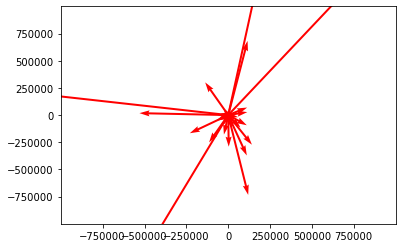

In [11]:
def main_loop(x, v, p_best, g_best, iterations):
    w = 0.5 ## range 0.4 - 0.9
    c1 = 1.5
    c2 = 1.5

    for t in range(iterations):
        for i in range(initial_population_size):
            r1 = np.random.random()
            r2 = np.random.random()
            v[i] = w*v[i] + c1*r1*(p_best[i]-x[i]) + c2*r2*(g_best-x[i])
            x[i] = x[i] + v[i]
            p_best = get_p_best(p_best, x)
            g_best = get_g_best(p_best, g_best)
        
        xlist = list(map(lambda p: p[0], x))
        ylist = list(map(lambda p: p[1], x))
        vxlist = list(map(lambda p: p[0], v))
        vylist = list(map(lambda p: p[1], v))
        clear_output(wait=True)
        plt.xlim(-999999, 999999)
        plt.ylim(-999999, 999999)
        plt.scatter(xlist, ylist)
        plt.quiver(xlist, ylist, vxlist, vylist, color=['r'])
        plt.show()

    return objective_funtion(g_best[0],g_best[1])


a = main_loop(population.copy(), velocity.copy(), personal_best.copy(), global_best.copy(), 100)

Text(0.5, 0, 'x')

Text(0.5, 0.5, 'y')

Text(0.5, 0, 'z')

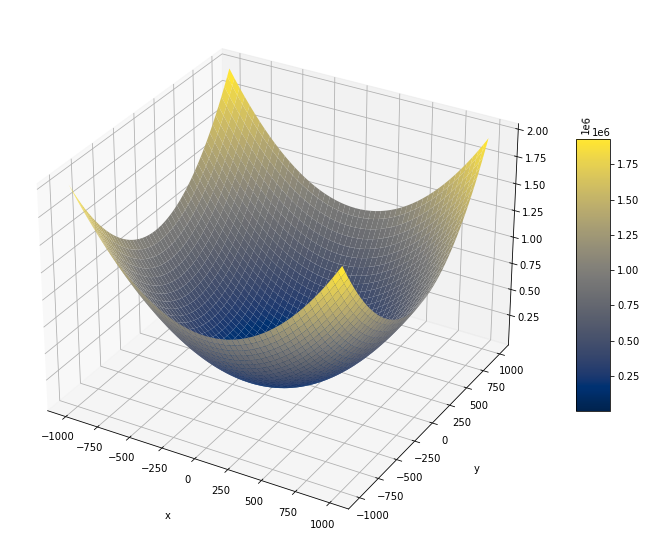

In [5]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')
x = np.arange(-999, 999.1, 10)
y = np.arange(-999, 999.1, 10)

X, Y = np.meshgrid(x, y)
Z = objective_funtion(X, Y)

surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

# Set axes label
ax.set_xlabel('x', labelpad=20)
ax.set_ylabel('y', labelpad=20)
ax.set_zlabel('z', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=8)

plt.show()
